In [125]:
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline


#read data here
df=pd.read_csv('C:/Users/RUPA/Downloads/haptiktraindata.csv')

In [126]:
df.head(5)

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,F,F,F,T,F,F,F,F,F
1,chocolate cake,T,F,F,F,F,F,F,F,F
2,closed mortice and tenon joint door dimentions,F,F,T,F,F,F,F,F,F
3,train eppo kelambum,F,F,F,F,T,F,F,F,F
4,yesterday i have cancelled the flight ticket,F,F,F,F,T,F,F,F,F


In [127]:
df.isnull().sum()
# no null data

message      0
food         0
recharge     0
support      0
reminders    0
travel       0
nearby       0
movies       0
casual       0
other        0
dtype: int64

## Having a look at this dataframe, it's evident that there are multiple categories and depending on the message, each category for that particular message has been encoded as a True and the rest False. Which means, per message, there can be only one category which holds true.

In [128]:
def label_race (row):
    '''
       Informal reverse of One Hot Encoding
       ---------
       Parameters- row
       ---------
       Function-Checks every row for a category marked with True
       and returns name of the first category
    '''
    if row['food'] == "T":
        return 'food'
    elif row['recharge'] == "T":
        return 'recharge'
    elif row['support'] == "T":
        return 'support'
    elif row['reminders'] == "T":
        return 'reminders'
    elif row['travel'] == "T":
        return 'travel'
    elif row['nearby'] == "T":
        return 'nearby'
    elif row['movies'] == "T":
        return 'movies'
    elif row['casual'] == "T":
        return 'casual'
    else:
        return "other"


In [129]:
# apply label_race() funtion to the columns , add new col 'category' to dataframe
df['category']=df.apply(lambda row: label_race(row),axis=1)

# drop the other columns
drp_col=["food", "recharge", "support", "reminders", "nearby", "movies", "casual", "other", "travel"]
df=df.drop(drp_col,1)


In [130]:
df.head(5)

,message,category
0,7am everyday,reminders
1,chocolate cake,food
2,closed mortice and tenon joint door dimentions,support
3,train eppo kelambum,travel
4,yesterday i have cancelled the flight ticket,travel


## Next step:
1. To convert this textual data to Vectors , to apply ML algos.
2. Employ a normal **TF-IDF vectorizer** to vectorize the message column and label encode the category column, essentially making it a classification problem.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Sampling only 1000 samples of each category because 
df = df.groupby('category').apply(lambda x: x.sample(n=1000, random_state=0))
df.category.value_counts()

support      1000
other        1000
casual       1000
nearby       1000
travel       1000
food         1000
recharge     1000
reminders    1000
movies       1000
Name: category, dtype: int64

In [132]:
# Converting all messages to lower case and storing it
all_text = df["message"].str.lower()

# Initialising TF-IDF object
tfidf = TfidfVectorizer(stop_words="english")

# Vectorizing data
tfidf.fit(all_text)

# Storing the TF-IDF vectorized data into an array
X = tfidf.transform(all_text).toarray()

# Initiating a label encoder object
le = LabelEncoder()

# Fitting the label encoder object on the data
le.fit(df["category"])

# Transforming the data and storing it
y = le.transform(df["category"])

In [133]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
# Splitting the data into train and test sets
X_train, X_val,y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Implementing Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)
log_accuracy = accuracy_score(y_val,y_pred)
print (str(log_accuracy)+(" is the accuracy of the logistic regression model"))



0.7066666666666667 is the accuracy of the logistic regression model


In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_val)
nb_accuracy = accuracy_score(y_val,y_pred)
print (str(nb_accuracy)+(" is the accuracy of the Naive Bayes model"))


# Implementing Linear SVM model
lsvm = LinearSVC(random_state=0)
lsvm.fit(X_train, y_train)
y_pred = lsvm.predict(X_val)
lsvm_accuracy = accuracy_score(y_val,y_pred)
print (str(lsvm_accuracy)+(" is the accuracy of the LinearSVC model"))

0.7114814814814815 is the accuracy of the Naive Bayes model
0.7125925925925926 is the accuracy of the LinearSVC model


## lets check validation of test data

In [135]:

df_test=pd.read_csv('C:/Users/RUPA/Downloads/haptiktestdata.csv')
df_test.isnull().sum()

message      0
food         0
recharge     0
support      0
reminders    0
travel       0
nearby       0
movies       0
casual       0
other        0
dtype: int64

In [136]:
#Creating the new column category
df_test["category"] = df_test.apply (lambda row: label_race (row),axis=1)



In [137]:
df_test.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other,category
0,Nearest metro station,F,F,F,F,F,T,F,F,F,nearby
1,Pick up n drop service trough cab,F,F,F,F,T,F,F,F,F,travel
2,I wants to buy a bick,F,F,F,F,F,F,F,F,T,other
3,Show me pizza,T,F,F,F,F,F,F,F,F,food
4,What is the cheapest package to andaman and ni...,F,F,F,F,T,F,F,F,F,travel


In [138]:
#Dropping the other columns
drop= ["food", "recharge", "support", "reminders", "nearby", "movies", "casual", "other", "travel"]
df_test=  df_test.drop(drop,1)


all_text=df_test['message'].str.lower()
X_test=tfidf.transform(all_text)
y_test=le.transform(df_test['category'])
y_pred=log_reg.predict(X_test)
log_accuracy_2=accuracy_score(y_pred,y_test)
print (str(log_accuracy_2)+(" is the accuracy of the logistic regression model"))

y_pred2 = nb.predict(X_test)
nb_accuracy_2 = accuracy_score(y_test,y_pred2)
print (str(nb_accuracy_2)+(" is the accuracy of the Naive Bayes model"))


# Implementing Linear SVM model

y_pred3 = lsvm.predict(X_test)
lsvm_accuracy_2 = accuracy_score(y_test,y_pred3)
print (str(lsvm_accuracy_2)+(" is the accuracy of the LinearSVC model"))

0.77 is the accuracy of the logistic regression model
0.6839 is the accuracy of the Naive Bayes model
0.7604 is the accuracy of the LinearSVC model


In [139]:
y_pred

array([3, 7, 4, ..., 0, 4, 4])

## TOPIC MODELLING USING GENSIM

In [140]:
! pip install gensim

In [141]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint


# Creating a stopwords list
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents from the complaints column
list_of_docs = df["message"].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]

# dictionary of corpora
dictionary = corpora.Dictionary(doc_clean)
# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]



## TOPIC MODELLING USING LATENT SEMANTIC INDEXING

Parameters:
1. **corpus ({iterable of list of (int, float), scipy.sparse.csc}, optional)** – Stream of document vectors or sparse matrix of shape (num_terms, num_documents). If not given, the model is left untrained (presumably because you want to call update() manually).

2. **num_topics (int, optional)** – The number of requested latent topics to be extracted from the training corpus.

3. **id2word ({dict of (int, str), gensim.corpora.dictionary.Dictionary})** – Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.



In [142]:
# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '-0.347*"reminder" + -0.267*"like" + -0.267*"cancel" + -0.266*"would" + '
  '-0.256*"exotel" + -0.256*"apiname" + -0.256*"userid" + -0.256*"offset" + '
  '-0.255*"taskname" + -0.255*"reminderlist"'),
 (1,
  '-0.831*"want" + -0.221*"u" + -0.187*"know" + -0.181*"movie" + -0.135*"book" '
  '+ -0.128*"ticket" + -0.114*"need" + -0.108*"hi" + -0.096*"please" + '
  '-0.092*"service"'),
 (2,
  '-0.451*"reminder" + 0.328*"call" + 0.316*"u" + 0.232*"wake" + '
  '-0.204*"water" + 0.197*"march" + 0.192*"wakeup" + -0.186*"every" + '
  '-0.181*"drink" + -0.168*"want"'),
 (3,
  '-0.611*"u" + 0.419*"want" + -0.244*"need" + -0.238*"reminder" + '
  '-0.197*"please" + -0.143*"movie" + -0.117*"service" + 0.102*"wake" + '
  '-0.101*"near" + -0.101*"help"'),
 (4,
  '0.622*"need" + -0.510*"u" + 0.491*"movie" + 0.189*"offer" + -0.137*"want" + '
  '0.116*"ticket" + 0.058*"know" + 0.052*"today" + -0.051*"find" + '
  '0.049*"book"')]


## TOPIC MODELLING WITH  LDA (Latent Dirichlet allocation)

In [143]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel



coherencevalues() trains multiple LDA models and provides the models and their corresponding coherence scores.

In [144]:
# Function to calculate coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    topic_list : No. of topics chosen
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    topic_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, random_state = 0, num_topics=num_topics, id2word = dictionary, iterations=10)
        topic_list.append(num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return topic_list, coherence_values




In [146]:
# Calling the function
topic_list, coherence_value_list = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=1, limit=41, step=5)
print(coherence_value_list)


[0.3287476298674388, 0.4781725872247256, 0.46115894529180984, 0.5253656906944698, 0.5285224478360521, 0.5593474153069067, 0.5595998259747449, 0.5761708096054737]


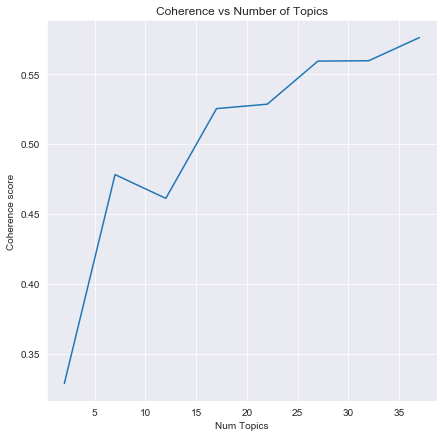

In [147]:
import seaborn as sns

limit=41; start=2; step=5;
x = range(start, limit, step)

# Setting the plotting area
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(x, coherence_value_list)

# Labelling the axes
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence vs Number of Topics")
plt.show()

In [148]:
for m, cv in zip(x, coherence_value_list):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3287
Num Topics = 7  has Coherence Value of 0.4782
Num Topics = 12  has Coherence Value of 0.4612
Num Topics = 17  has Coherence Value of 0.5254
Num Topics = 22  has Coherence Value of 0.5285
Num Topics = 27  has Coherence Value of 0.5593
Num Topics = 32  has Coherence Value of 0.5596
Num Topics = 37  has Coherence Value of 0.5762


In [149]:
max_index=coherence_value_list.index(max(coherence_value_list))

# Finding the optimum no. of topics associated with the maximum coherence value
opt_topic= topic_list[max_index]
print("Optimum no. of topics:", opt_topic)


Optimum no. of topics: 36


## EVALUATING THE LDA MODEL

Intuitively, topic coherence is calculated by combining the pairwise scores between the words that are used to form the topic. Different topic coherence measures use different scoring mechanisms to calculate the score. **Higher the coherence score, better the model. In gensim we can call the topic coherence as follows**

CoherenceModel(model=ldamodel, texts=docs, dictionary=dictionary, coherence='c_v')

In [150]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
perplexity_lda=lda_model.log_perplexity(doc_term_matrix)
coherence_model_lda=CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')

# Compute Coherence Score
coherence_lda=coherence_model_lda.get_coherence()
print(coherence_lda)

0.6428178176321784


In [151]:
pprint(lda_model.print_topics(5))


[(3,
  '0.197*"tell" + 0.114*"nearby" + 0.097*"hotel" + 0.086*"looking" + '
  '0.047*"home" + 0.041*"u" + 0.030*"delivery" + 0.022*"domino" + 0.013*"veg" '
  '+ 0.013*"restaurant"'),
 (24,
  '0.251*"know" + 0.168*"want" + 0.094*"buy" + 0.052*"bangalore" + '
  '0.049*"cheapest" + 0.041*"let" + 0.031*"city" + 0.030*"whats" + 0.011*"u" + '
  '0.010*"available"'),
 (4,
  '0.226*"number" + 0.081*"shop" + 0.064*"store" + 0.060*"hyderabad" + '
  '0.032*"sunday" + 0.025*"great" + 0.022*"3rd" + 0.020*"u" + 0.017*"window" + '
  '0.015*"door"'),
 (19,
  '0.306*"train" + 0.136*"help" + 0.098*"hey" + 0.077*"best" + 0.038*"u" + '
  '0.020*"getting" + 0.020*"15" + 0.018*"working" + 0.018*"link" + '
  '0.014*"icici"'),
 (32,
  '0.244*"service" + 0.203*"delhi" + 0.115*"new" + 0.079*"centre" + '
  '0.036*"night" + 0.018*"meeting" + 0.006*"regular" + 0.006*"include" + '
  '0.005*"picture" + 0.005*"breakfast"')]


### VISUALIZING THE TOPICS USING pyLDAvis

In [152]:
! pip install pyLDAvis 

In [ ]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

## How to infer pyLDAvis’s output?

1. Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

2. A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

3. Move the cursor over one of the bubbles, the words and bars on the right-hand side will get updated. These words are the salient keywords that form the selected topic. 

In [ ]:
vis

In [155]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Finding the dominant topic in each sentence
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0278,"like, would, sir, kya, till, open, case, live,...",[others]
1,1,19.0,0.4036,"train, help, hey, best, u, getting, 15, workin...","[u, please, help]"
2,2,19.0,0.2569,"train, help, hey, best, u, getting, 15, workin...","[tapped, mistake, thanks, help]"
3,3,20.0,0.5139,"call, 800, nearest, ok, pizza, problem, ke, ho...",[yaar]
4,4,14.0,0.7569,"detail, received, note, mean, ask, branch, peo...","[careless, u, people]"
5,5,17.0,0.6759,"2, plz, day, morning, card, hr, search, care, ...","[u, search]"
6,6,16.0,0.3426,"need, first, much, thank, no, n, information, ...","[need, help]"
7,7,0.0,0.0278,"like, would, sir, kya, till, open, case, live,...",[deepz]
8,8,16.0,0.2569,"need, first, much, thank, no, n, information, ...","[sorry, done, need]"
9,9,18.0,0.4056,"phone, thanks, road, ahmedabad, company, 6th, ...","[thanks, offer, right, thanks]"


In [156]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6759,"like, would, sir, kya, till, open, case, live,...","[santosh, dhaba, veggie]"
1,1.0,0.8380,"near, location, place, restaurant, timing, me,...","[multi, cuisine, restaurant, lower, parel]"
2,2.0,0.7569,"offer, send, back, pune, 10, kolkata, later, m...","[anything, rajasthani, kolkata]"
3,3.0,0.8380,"tell, nearby, hotel, looking, home, u, deliver...","[tell, famous, restaurant, non, veg]"
4,4.0,0.7569,"number, shop, store, hyderabad, sunday, great,...","[thanx, u, mucj]"
5,5.0,0.8056,"ticket, movie, available, also, logan, mall, n...","[ticket, available, movie, logan]"
6,6.0,0.8056,"sorry, hindi, it, assist, shall, never, half, ...","[sorry, mistake, selected, it]"
7,7.0,0.8380,"bus, pm, stop, list, wanted, person, 9, update...","[instead, chicken, given, egg, curry]"
8,8.0,0.7569,"find, give, booking, u, nearest, full, okay, t...","[u, just, entertainment]"
9,9.0,0.8379,"bill, coupon, code, 4, rate, right, table, per...","[haptic, known, virtual, assistant, right]"


## WORD CLOUD VISUALIZATION

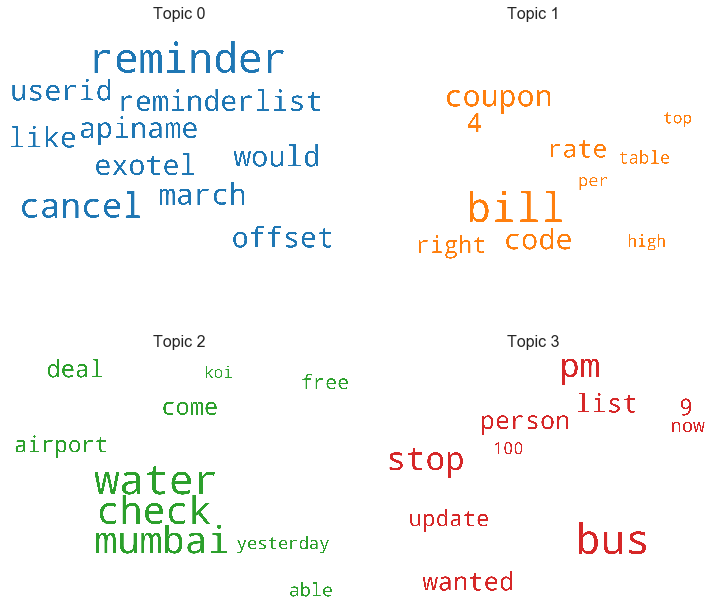

In [157]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

plt.show()